In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_csv('/Users/pradmishra/Documents/insurance.csv')

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
df.shape

(1338, 7)

In [0]:
#Q1- does this dataset cover all the regions equally, or is it biased towards one region?

#Q2- how the age distribution been in US, healthcare, given that the distribution of charges?

#Q3- Are there any relatiosnhip/pattern in sex and age of patients?

#Q4- Are there any gender bias in different regions?

#Q5- what is the distribution of smoker/non-smoker in different regions?

#Q6- how the BMI index has been for the entire country?

#Q7- are there any association between distribution of BMI and gender?

#Q8- Are the insurance charges fair to all?

#Q9- How the association between charges and BMI change across smoker vs. non-smoker?

#Q10- How the association between charges and BMI change across male vs.female?

#complex:
#Q11- Do the people who are overweight, smoking and having more than 2 children pay more charges than others?


In [0]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


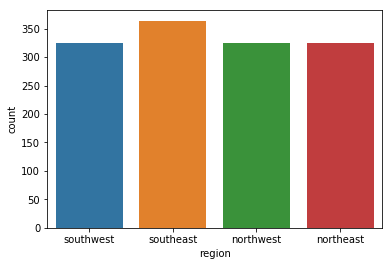

In [0]:
sns.countplot(x='region',data=df)

In [0]:
df.region.value_counts()/df.shape[0] # distribution of regions

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


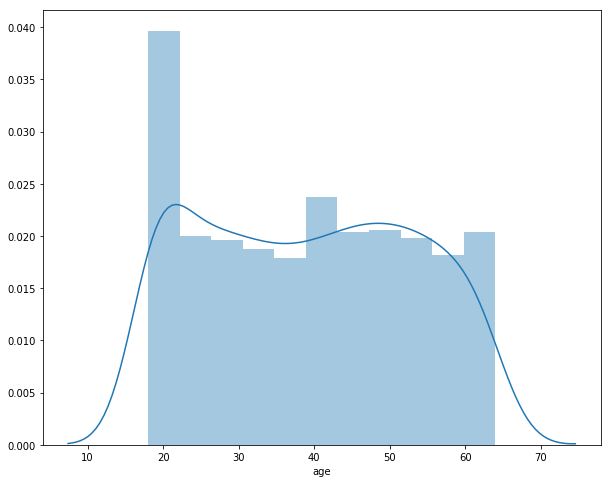

In [0]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'])

In [0]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [0]:
(64-18)/5

9.2

In [0]:
18+9.2

27.2

In [0]:
27.2+9.2

36.4

In [0]:
36.4+9.2

45.599999999999994

In [0]:
45.59+9.2

54.790000000000006

In [0]:
cut_points = [17,20,35,50,65]
label_names = ['adolescent','young_adults','adults','Seniors']

In [0]:
df['age_cat'] = pd.cut(df['age'],cut_points,labels=label_names)

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,adolescent
1,18,male,33.770,1,no,southeast,1725.55230,adolescent
2,28,male,33.000,3,no,southeast,4449.46200,young_adults
3,33,male,22.705,0,no,northwest,21984.47061,young_adults
4,32,male,28.880,0,no,northwest,3866.85520,young_adults


In [0]:
set(df.age_cat)

{'Seniors', 'adolescent', 'adults', 'young_adults'}

In [0]:
df.age_cat.value_counts()/df.shape[0]

adults          0.304933
young_adults    0.304933
Seniors         0.266069
adolescent      0.124066
Name: age_cat, dtype: float64

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


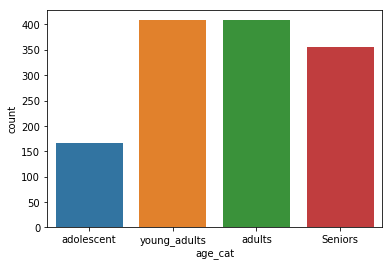

In [0]:
sns.countplot(x='age_cat',data=df)

In [0]:
# Hypothesis:

# Null : G1 = G2 = G3 = G4
# Alt : at least one Group is different from others

# Alt1 : G1 != G2 = G3 = G4
# Alt2 : G1 = G2 != G3 = G4
# Alt3 : G1 = G2 = G3 != G4
# so on so forth

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [0]:
results = pairwise_tukeyhsd(df.charges,df.age_cat)

In [0]:
results.summary()

group1,group2,meandiff,lower,upper,reject
Seniors,adolescent,-9371.5048,-12181.3203,-6561.6893,True
Seniors,adults,-4054.9897,-6223.2588,-1886.7205,True
Seniors,young_adults,-7921.0351,-10089.3043,-5752.766,True
adolescent,adults,5316.5152,2564.2301,8068.8002,True
adolescent,young_adults,1450.4697,-1301.8154,4202.7548,False
adults,young_adults,-3866.0455,-5959.2252,-1772.8658,True


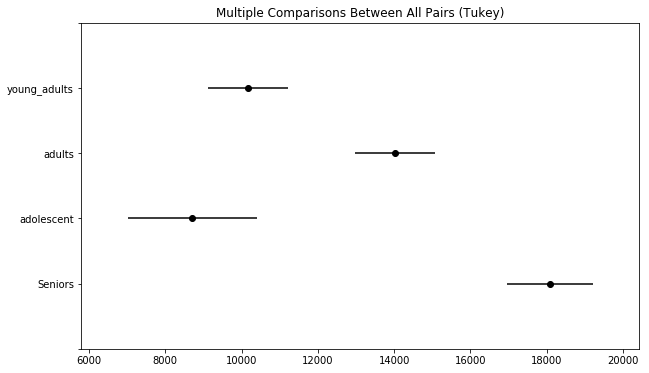

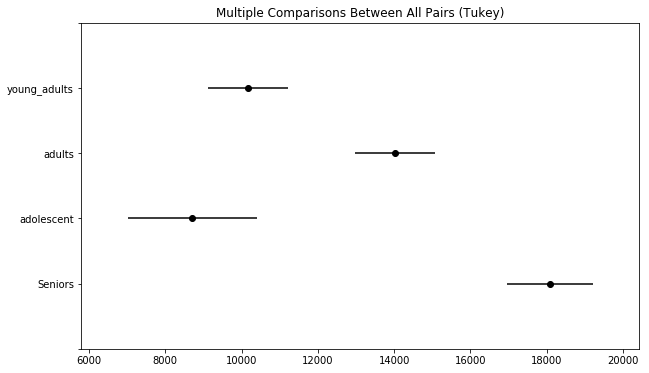

In [0]:
results.plot_simultaneous()

In [0]:
results.confint

array([[-12181.32032148,  -6561.68929925],
       [ -6223.25883516,  -1886.72048377],
       [-10089.30430796,  -5752.76595657],
       [  2564.23005878,   8068.80024301],
       [ -1301.81541402,   4202.75477022],
       [ -5959.22516887,  -1772.86577672]])

In [0]:
results.meandiffs

array([-9371.50481037, -4054.98965947, -7921.03513226,  5316.5151509 ,
        1450.4696781 , -3866.04547279])

In [0]:
results.groups

array(['adolescent', 'adolescent', 'young_adults', ..., 'adolescent',
       'young_adults', 'Seniors'], dtype=object)

In [0]:
df.pivot_table(values='charges',columns=['age_cat'],aggfunc=np.mean)

age_cat,adolescent,young_adults,adults,Seniors
charges,8713.482413,10163.952091,14029.997563,18084.987223


/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


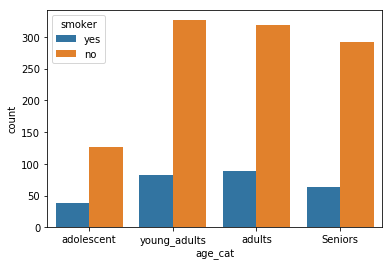

In [0]:
sns.countplot(x='age_cat',data=df,hue='smoker')

In [0]:
df.pivot_table(values='charges',index=['smoker'],columns=['age_cat'],aggfunc=np.mean)

age_cat,adolescent,young_adults,adults,Seniors
smoker,,,,
no,3413.875214,5399.73804,8860.261886,13540.277993
yes,25971.177649,29104.60795,32559.724319,38820.223082


In [0]:
df.pivot_table(values='charges',index=['smoker','sex'],columns=['age_cat'],aggfunc=np.mean)

age_cat          adolescent  young_adults        adults       Seniors
smoker sex                                                           
no     female   3583.173373   5670.058618   9026.088827  13911.508909
       male     3247.222338   5122.701423   8682.590163  13126.005813
yes    female  24094.753987  28620.943214  30391.010300  37745.342093
       male    27421.141389  29430.341343  34175.628882  39604.595696

In [0]:
# i am an adult, i want to reduce my average charges by 20% what should i do?

# answer:
# should i quit smoking?